In [1]:
import pandas as pd
import numpy as np 
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder,LabelBinarizer
from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.pipeline import make_pipeline as imbl_pipe
from imblearn.over_sampling import SMOTE

#hyper-parameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix


#keras



In [2]:
churn_df = pd.read_csv(r"/Users/iqrabismi/Desktop/SJSU DATA ANALYTICS/semester 2/machine learning/project/Churn_Modelling.csv")

In [3]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing

#### Changing the name of target column from 'Exited' to 'Churn'

In [208]:
churn_df= churn_df.rename(columns= {'Exited':'Churn'})

#### Checking the datatypes

In [5]:
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

#### Checking the null values

In [6]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

#### Checking the duplicates 

In [7]:
churn_df.duplicated().sum()

0

#### Dropping the RowNumber and Surname Column

In [8]:
churn_df.drop('RowNumber', axis= 1, inplace= True)

In [9]:
churn_df.drop('Surname', axis= 1, inplace= True)

#### Changing the dtype of target feature, IsActiveMember, hasCrCard and NumOfProducts from int to categorical

In [10]:
churn_df['Churn'] = churn_df['Churn'].astype('category')

In [11]:
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype('category')

In [12]:
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype('category')

In [13]:
churn_df['NumOfProducts'] = churn_df['NumOfProducts'].astype('category')

#### Data Quality Report for Numeric Features

In [14]:
churn_numeric= churn_df.select_dtypes(include= ['int','float'])

In [15]:
churn_stats= pd.DataFrame(churn_numeric.describe().transpose())


In [16]:
churn_stats

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Checking the cardinality for numeric features

In [17]:
cardinality=[]

for i in churn_numeric.columns:
    cardinality.append(churn_numeric[i].nunique())
    

In [18]:
churn_stats['cardinality'] = cardinality

#### Changing the column names

In [19]:
churn_stats.columns= ['Count','Mean','Std Dev','Min','First Quart','Second Quart','Third Quart','Max', 'Cardinality']

In [20]:
churn_stats= churn_stats.applymap(lambda x: int(x))

In [21]:
churn_stats

,Count,Mean,Std Dev,Min,First Quart,Second Quart,Third Quart,Max,Cardinality
CustomerId,10000,15690940,71936,15565701,15628528,15690738,15753233,15815690,10000
CreditScore,10000,650,96,350,584,652,718,850,460
Age,10000,38,10,18,32,37,44,92,70
Tenure,10000,5,2,0,3,5,7,10,11
Balance,10000,76485,62397,0,0,97198,127644,250898,6382
EstimatedSalary,10000,100090,57510,11,51002,100193,149388,199992,9999


#### Dropping CustomerID as the cardinality is equal to the number of instances

In [22]:
churn_df.pop('CustomerId')

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

#### Data Quality Report for Categorical Features

In [23]:
churn_categ= churn_df.select_dtypes(include= ['category','object'])

In [24]:
churn_categ_stats= pd.DataFrame(churn_categ.describe().transpose())

In [25]:
cardinality=[]

for i in churn_categ.columns:
    cardinality.append(churn_categ[i].nunique())
  

In [26]:
churn_categ_stats['cardinality']= cardinality

In [27]:
churn_categ_stats

,count,unique,top,freq,cardinality
Geography,10000,3,France,5014,3
Gender,10000,2,Male,5457,2
NumOfProducts,10000,4,1,5084,4
HasCrCard,10000,2,1,7055,2
IsActiveMember,10000,2,1,5151,2
Churn,10000,2,0,7963,2


In [28]:
mode= []

for i in churn_categ.columns:
    mode.append(stat.mode(churn_categ[i]))
 

In [29]:
churn_categ_stats['mode']= mode

In [30]:
churn_categ_stats

,count,unique,top,freq,cardinality,mode
Geography,10000,3,France,5014,3,France
Gender,10000,2,Male,5457,2,Male
NumOfProducts,10000,4,1,5084,4,1
HasCrCard,10000,2,1,7055,2,1
IsActiveMember,10000,2,1,5151,2,1
Churn,10000,2,0,7963,2,0


## Explonatory Data Analysis

#### Plotting Histograms for Numeric Features

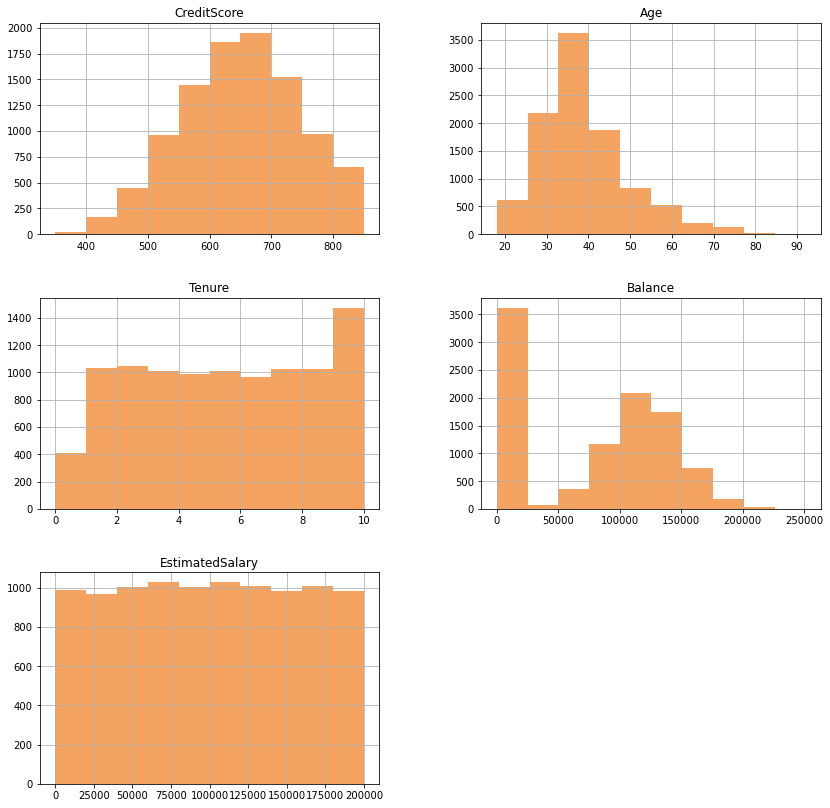

In [31]:
churn_df.hist(figsize=(14,14), color= 'sandybrown')

plt.show()

#### Plotting Countplot for categorical Features

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

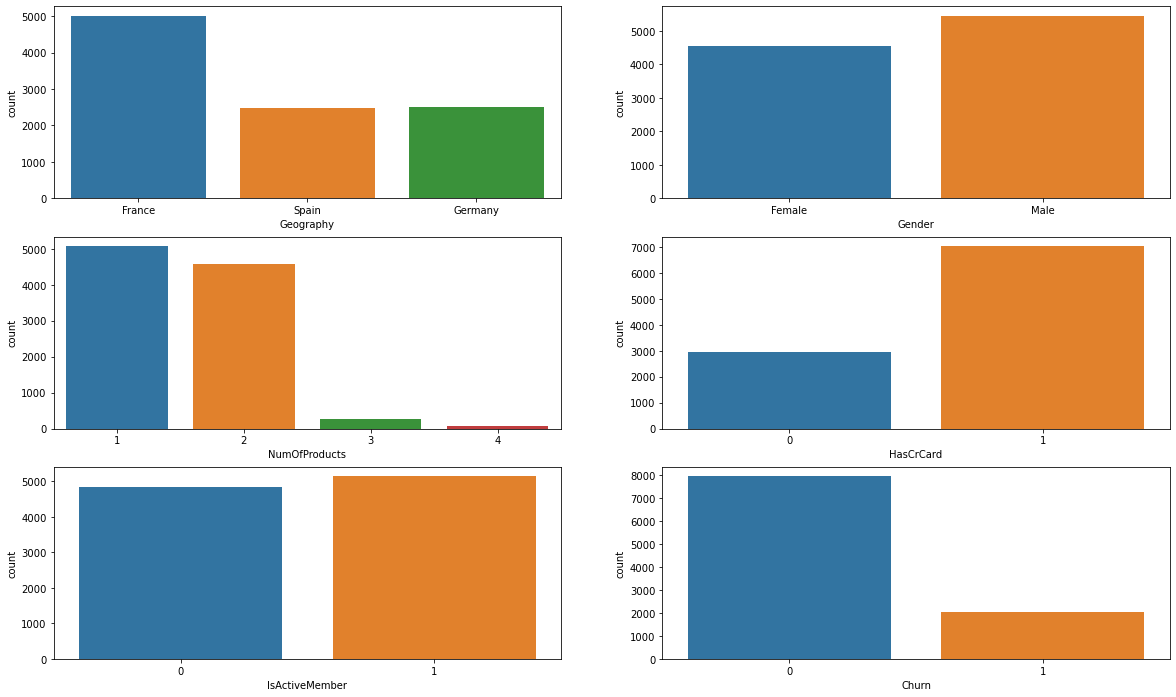

In [32]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(churn_df['Geography'], ax=axarr[0][0])
sns.countplot(churn_df['Gender'], ax=axarr[0][1])
sns.countplot(churn_df['NumOfProducts'], ax=axarr[1][0])  
sns.countplot(churn_df['HasCrCard'], ax=axarr[1][1]) 
sns.countplot(churn_df['IsActiveMember'], ax=axarr[2][0])  
sns.countplot(churn_df['Churn'], ax=axarr[2][1])

#### Plotting the KDE Plot for Balance wrt to Churn Feature

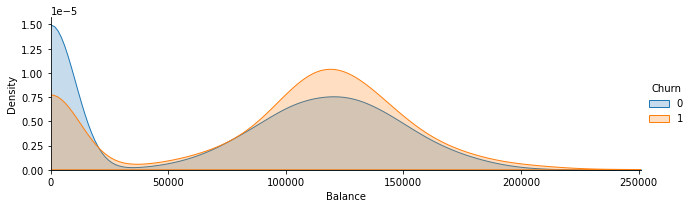

In [33]:
facet = sns.FacetGrid(churn_df, hue="Churn",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, churn_df["Balance"].max()))
facet.add_legend()
plt.show()

#### Churn Segmentation for Categorical Variables

#### Churn wrt Gender

In [34]:
churn_categ_gender = pd.DataFrame(churn_categ.groupby('Gender').Churn.value_counts())

In [35]:
churn_categ_gender.reset_index(inplace= True)

In [36]:
churn_categ_gender.columns= ['Gender','churned','Churn']

In [39]:
churn_categ_gender

,Gender,churned,Churn
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


In [40]:
churn_categ_gender1 = pd.DataFrame(churn_categ.groupby('Gender').Churn.value_counts(normalize= True))

In [41]:
churn_categ_gender1.reset_index(inplace= True)

In [42]:
churn_categ_gender1['Churn'] = churn_categ_gender1['Churn'].apply(lambda x: round(x*100))

In [43]:
churn_categ_gender1.columns= ['Gender','churned','Churn']

In [44]:
churn_categ_gender1

,Gender,churned,Churn
0,Female,0,75
1,Female,1,25
2,Male,0,84
3,Male,1,16


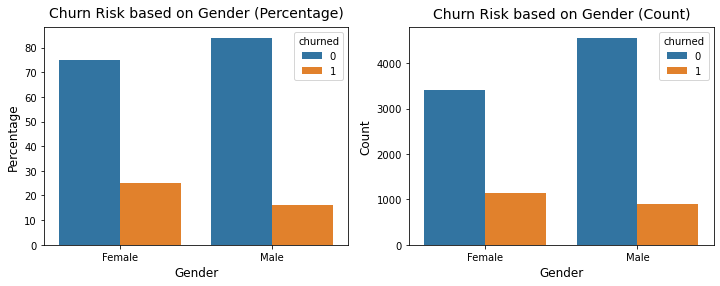

In [45]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))

sns.barplot(data= churn_categ_gender1, x= 'Gender', y='Churn', hue= 'churned',ax=ax1)

ax1.set_title('Churn Risk based on Gender (Percentage)', fontsize=14, pad=10)
ax1.set_ylabel('Percentage',size=12)
ax1.set_xlabel('Gender', size=12)

sns.barplot(data=churn_categ_gender, x= 'Gender', y='Churn', hue= 'churned',ax=ax2)

ax2.set_title('Churn Risk based on Gender (Count)', fontsize=14, pad=10)
ax2.set_ylabel('Count',size=12)
ax2.set_xlabel('Gender', size=12)
plt.show()

#### Churn wrt Geography

In [46]:
churn_categ_geography = pd.DataFrame(churn_categ.groupby('Geography').Churn.value_counts())

In [47]:
churn_categ_geography.reset_index(inplace= True)

In [48]:
churn_categ_geography.columns= ['Geography','churned','Churn']

In [49]:
churn_categ_geography

,Geography,churned,Churn
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


In [50]:
churn_categ_geography1 = pd.DataFrame(churn_categ.groupby('Geography').Churn.value_counts(normalize= True))

In [51]:
churn_categ_geography1.reset_index(inplace= True)

In [52]:
churn_categ_geography1['Churn'] = churn_categ_geography1['Churn'].apply(lambda x: round(x*100))

In [53]:
churn_categ_geography1.columns= ['Geography','churned','Churn']

In [54]:
churn_categ_geography1

,Geography,churned,Churn
0,France,0,84
1,France,1,16
2,Germany,0,68
3,Germany,1,32
4,Spain,0,83
5,Spain,1,17


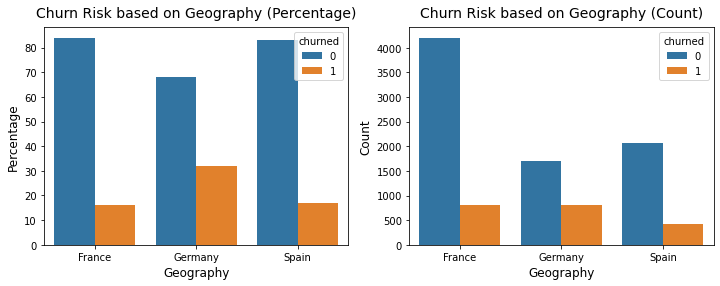

In [55]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))

sns.barplot(data= churn_categ_geography1, x= 'Geography', y='Churn', hue= 'churned',ax=ax1)

ax1.set_title('Churn Risk based on Geography (Percentage)', fontsize=14, pad=10)
ax1.set_ylabel('Percentage',size=12)
ax1.set_xlabel('Geography', size=12)

sns.barplot(data=churn_categ_geography, x= 'Geography', y='Churn', hue= 'churned',ax=ax2)

ax2.set_title('Churn Risk based on Geography (Count)', fontsize=14, pad=10)
ax2.set_ylabel('Count',size=12)
ax2.set_xlabel('Geography', size=12)
plt.show()

#### Churn wrt Active Member

In [56]:
churn_categ_activemember = pd.DataFrame(churn_categ.groupby('IsActiveMember').Churn.value_counts(normalize= True))

In [57]:
churn_categ_activemember.reset_index(inplace= True)

In [58]:
churn_categ_activemember['Churn'] = churn_categ_activemember['Churn'].apply(lambda x: round(x*100))

In [59]:
churn_categ_activemember.columns= ['IsActiveMember','churned','Churn']

In [60]:
churn_categ_activemember

,IsActiveMember,churned,Churn
0,0,0,73
1,0,1,27
2,1,0,86
3,1,1,14


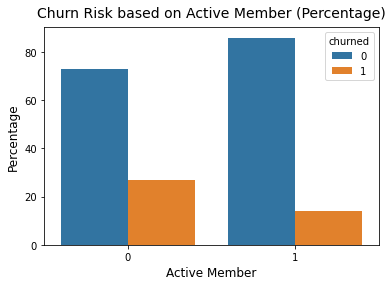

In [61]:
sns.barplot(data= churn_categ_activemember, x= 'IsActiveMember', y='Churn', hue= 'churned')

plt.title('Churn Risk based on Active Member (Percentage)', fontsize=14, pad=10)
plt.ylabel('Percentage',size=12)
plt.xlabel('Active Member', size=12)
plt.show()

#### Churn wrt Product Number

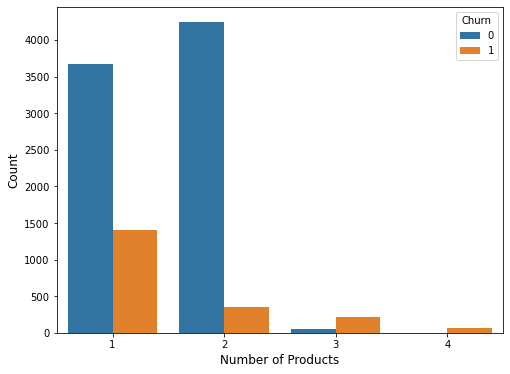

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(data= churn_df, x='NumOfProducts', hue= 'Churn')
plt.xlabel("Number of Products", size= 12)
plt.ylabel("Count", size= 12)
plt.show()

#### Churn wrt Credit Card

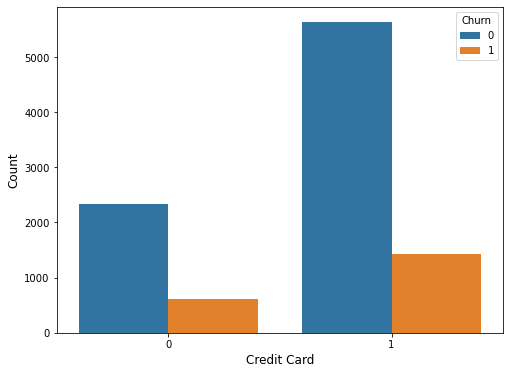

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(data= churn_df, x='HasCrCard', hue= 'Churn')
plt.xlabel("Credit Card", size= 12)
plt.ylabel("Count", size= 12)
plt.show()

#### Checking the Correlation between various

In [37]:
corr_df=churn_df.select_dtypes(include=['int','float','category'])
corr_df['Churn'] = corr_df['Churn'].astype('int')

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_26994/272562221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['Churn'] = corr_df['Churn'].astype('int')


<AxesSubplot:>

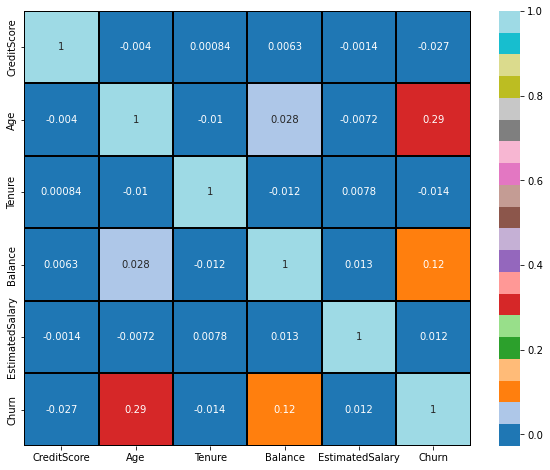

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df.corr(), cmap='tab20', linewidth= 2, linecolor= 'black', annot= True)

#### Analysing min and max values for top three features as per correlation values

In [39]:
top_features= pd.pivot_table(data= churn_df, columns= 'Churn', aggfunc= [np.min, np.max], values=['Age', 'Balance','EstimatedSalary'])

In [40]:
top_features.columns =[('Min','Retained'),('Min','Churn'),('Max','Retained'),('Max','Churn')]

In [41]:
top_features

,"(Min, Retained)","(Min, Churn)","(Max, Retained)","(Max, Churn)"
Age,18.00,18.00,92.00,84.00
Balance,0.00,0.00,221532.80,250898.09
EstimatedSalary,90.07,11.58,199992.48,199808.10


#### Checking the Outliers

<AxesSubplot:xlabel='Churn', ylabel='EstimatedSalary'>

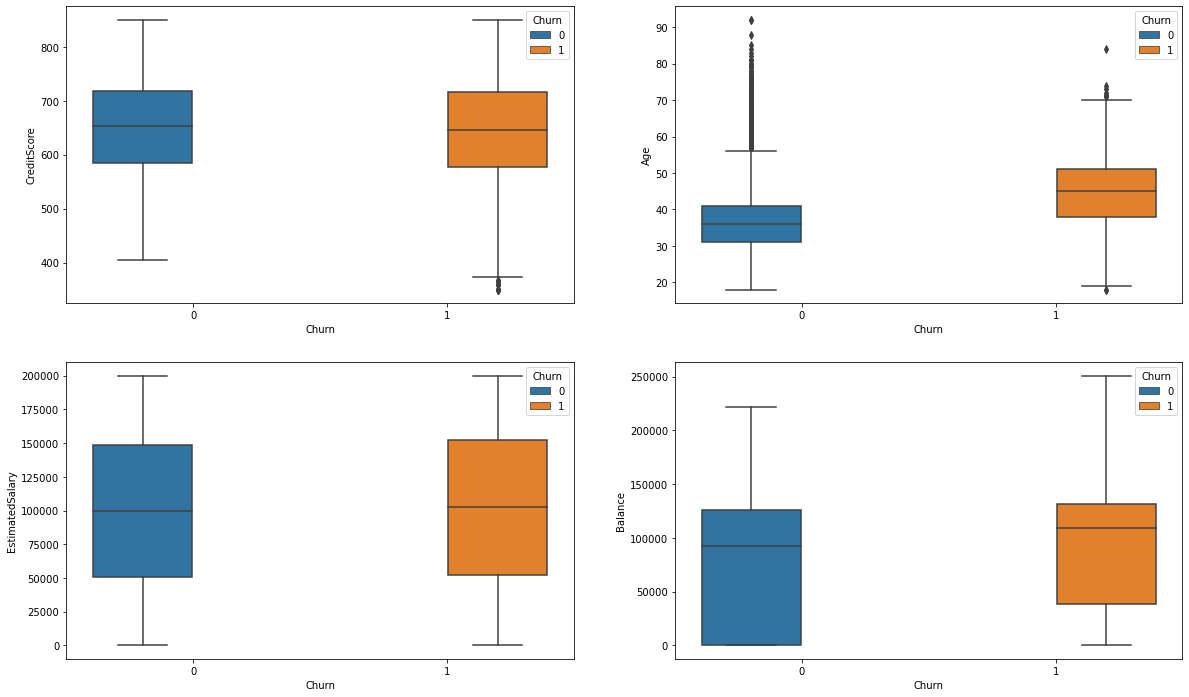

In [42]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Churn', hue = 'Churn',data = churn_df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Churn', hue = 'Churn',data = churn_df , ax=axarr[0][1])
sns.boxplot(y='Balance',x = 'Churn', hue = 'Churn',data = churn_df, ax=axarr[1][1])
sns.boxplot(y='EstimatedSalary',x = 'Churn', hue = 'Churn',data = churn_df, ax=axarr[1][0])

#### Outlier Clamping

In [43]:
def outlier_func(i):
    
    q1= np.percentile(i, 25)
    q3= np.percentile(i,75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    
    return [lower, upper]


In [44]:
col= ["CreditScore","Balance","EstimatedSalary","Age"]
for features in col:
    lower,upper = outlier_func(churn_df[features])
    churn_df[features]= churn_df[features].clip(upper= upper, lower=lower, axis= 0)
    if np.any(churn_df[features] > upper) or np.any(churn_df[features] < lower):
        print(features,"yes")
    else:
        print(features, "no")
    
    


CreditScore no
Balance no
EstimatedSalary no
Age no


### Class Imbalance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


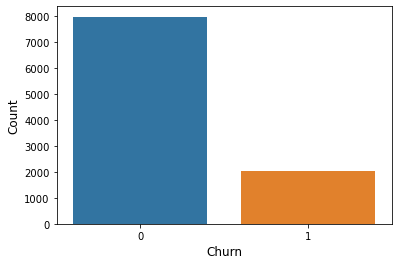

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(churn_df['Churn'])
plt.xlabel("Churn", size= 12)
plt.ylabel("Count", size= 12)
plt.show()

#### Estimated Salary WRT Location

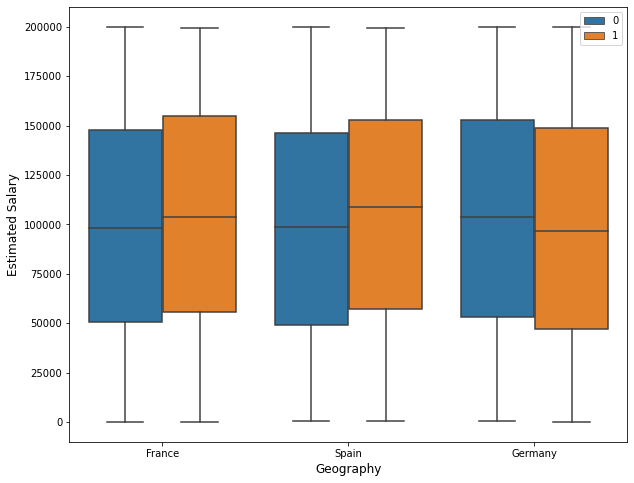

In [73]:
plt.figure(figsize=(10,8))
sns.boxplot(data= churn_df, x='Geography',y='EstimatedSalary', hue='Churn')
plt.xlabel("Geography", size= 12)
plt.ylabel("Estimated Salary", size= 12)
plt.legend(loc='upper right')
plt.show()

### Pair Plot

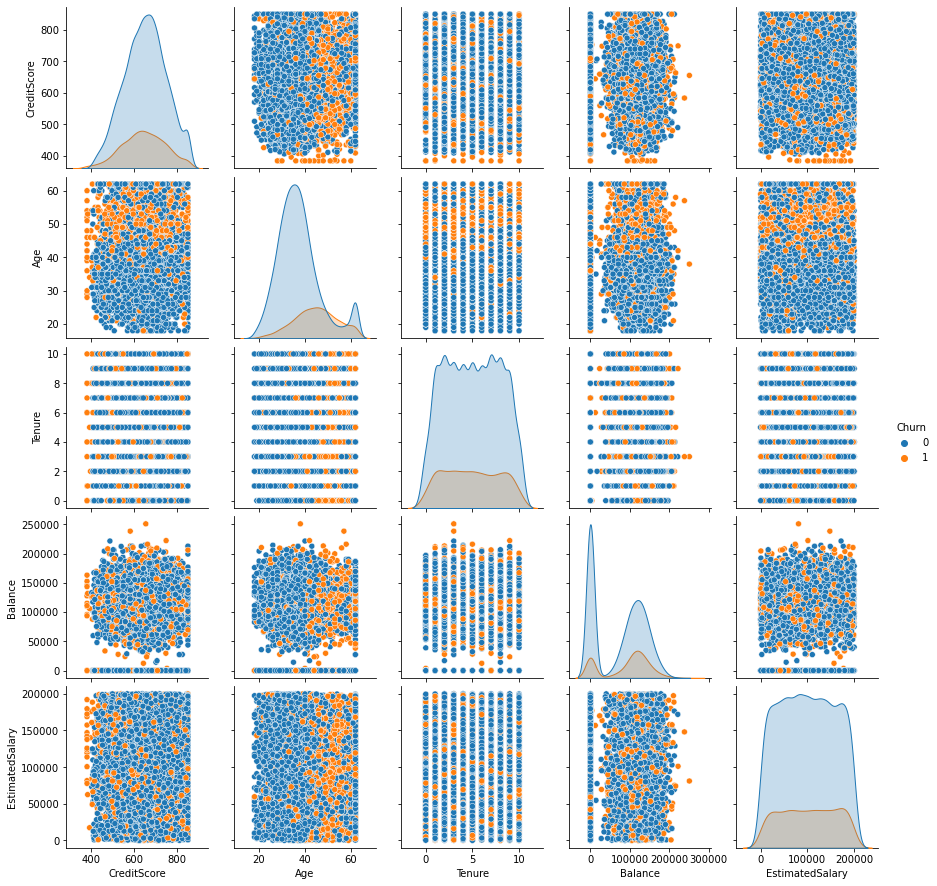

In [74]:
sns.pairplot(data= churn_df, hue= "Churn")

#### Reduced Pair Plot

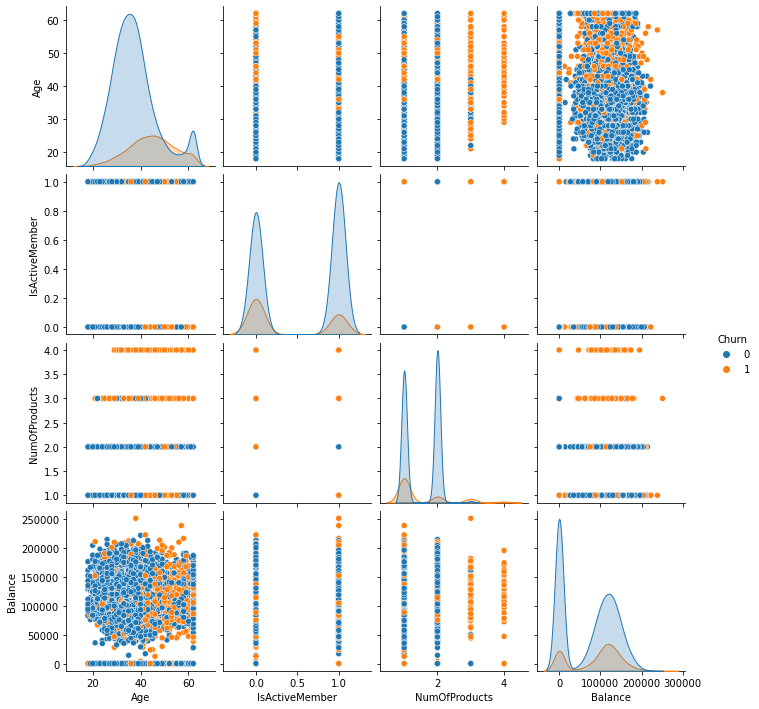

In [75]:
churned_df= churn_df.copy()
churned_df['IsActiveMember']= churned_df['IsActiveMember'].astype('int')
churned_df['NumOfProducts']= churned_df['NumOfProducts'].astype('int')
sns.pairplot(churned_df, hue='Churn',vars=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'])



## Analytical Base Table

In [46]:
abt= churn_df.head()
abt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## Feature Engineering

### Encoding the Categorical Data and Scaling the Numeric Data

In [47]:
X= churn_df.iloc[:,:-1].values
X #descriptive features

array([[619.0, 'France', 'Female', ..., 1, 1, 101348.88],
       [608.0, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502.0, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709.0, 'France', 'Female', ..., 0, 1, 42085.58],
       [772.0, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792.0, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [48]:
Y= churn_df.iloc[:,-1].values
Y #target features

[1, 0, 1, 0, 0, ..., 0, 0, 1, 1, 0]
Length: 10000
Categories (2, int64): [0, 1]

In [49]:
preprocessing = make_column_transformer( (MinMaxScaler(), [0, 3, 4, 5, 6, 7, 8, 9]),(OneHotEncoder(sparse=False), [1,2]))

In [50]:
preprocessing

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 3, 4, 5, 6, 7, 8, 9]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 2])])

In [51]:
X_preprocessed = preprocessing.fit_transform(X)

print(X_preprocessed.shape)

(10000, 13)


## Relevant Features

In [52]:
## dropping HasCrcard 

In [53]:
new_churn_df= churn_df.copy()

In [54]:
new_churn_df.drop(['HasCrCard'], inplace= True, axis= 1)

In [55]:
new_churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Churn
0,619.0,France,Female,42.0,2,0.00,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,0,96270.64,0
9996,516.0,France,Male,35.0,10,57369.61,1,1,101699.77,0
9997,709.0,France,Female,36.0,7,0.00,1,1,42085.58,1
9998,772.0,Germany,Male,42.0,3,75075.31,2,0,92888.52,1


In [56]:
X1= new_churn_df.iloc[:,:-1].values


In [57]:
preprocessing1 = make_column_transformer( (MinMaxScaler(),
                                          [0,  3, 4, 5, 6, 7,8]),(OneHotEncoder(sparse=False), [1,2]))

In [58]:
X_preprocessed1 = preprocessing1.fit_transform(X1)

print(X_preprocessed1.shape)

(10000, 12)


### Encoding the Target Data

In [59]:
label_binarizer = LabelBinarizer()

Y= label_binarizer.fit_transform(Y)


## Evaluation and Analysis

#### Splitting the data into test and train

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, Y,test_size=0.3, random_state=32,
                                                    stratify= churn_df.Churn)

# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, y_train.shape)

(7000, 13) (7000, 1)


In [61]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_preprocessed1, Y,test_size=0.3, random_state=32
                                                    )

# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train1.shape, y_train1.shape)

(7000, 12) (7000, 1)


### Logistic Regression

In [63]:
import pickle

In [209]:
with open('logreg_pkl', 'rb') as files:
    lr_clf= pickle.load(files)

In [210]:
pred= lr_clf.predict(X_test)

In [211]:
print('accuracy of Logistic Regression:', round(lr_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Logistic Regression: 71.0 %


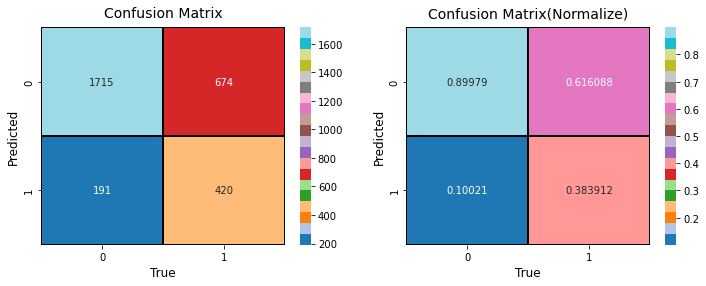

<Figure size 720x576 with 0 Axes>

In [67]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax= ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('True', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize= 'pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('True', size=12)


plt.show()

In [68]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 38.0 %
Recall: 69.0 %
F1 Score: 49.0 %


In [69]:
y_pred_probs = lr_clf.predict_proba(X_test)[:, 1]

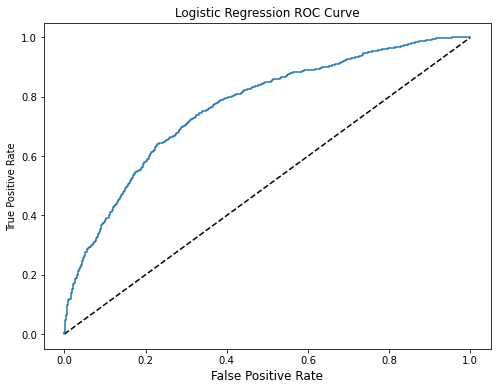

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', size= 12)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.7658683861314715


### KNeighbors Classifier

In [72]:
with open('knn_pkl', 'rb') as files:
    knn_clf= pickle.load(files)

In [73]:
pred= knn_clf.predict(X_test)

In [74]:
print('accuracy of kneighborsclassifier:', round(knn_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of kneighborsclassifier: 78.0 %


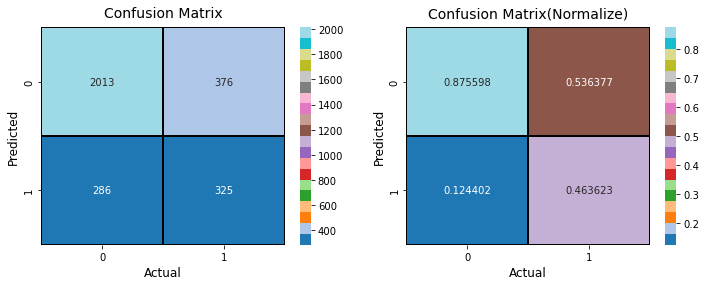

<Figure size 720x576 with 0 Axes>

In [75]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [76]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 46.0 %
Recall: 53.0 %
F1 Score: 50.0 %


In [77]:
y_pred_probs = knn_clf.predict_proba(X_test)[:, 1]

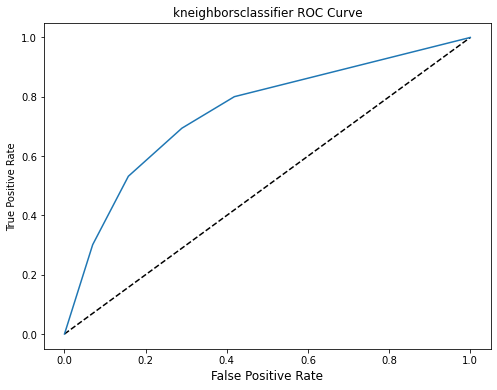

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('kneighborsclassifier ROC Curve', size= 12)
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.7478993669156028


## Decision Tree Classifier

In [80]:
with open('dt_pkl', 'rb') as files:
    dt_clf= pickle.load(files)

In [81]:
pred= dt_clf.predict(X_test)

In [82]:
print('accuracy of Decision Tree Classifier:', round(dt_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Decision Tree Classifier: 81.0 %


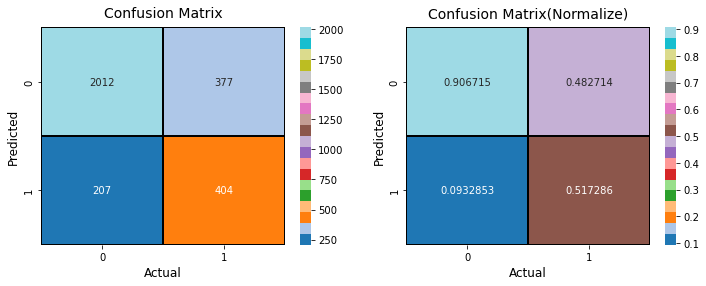

<Figure size 720x576 with 0 Axes>

In [83]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [84]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 52.0 %
Recall: 66.0 %
F1 Score: 57.99999999999999 %


In [85]:
y_pred_probs = dt_clf.predict_proba(X_test)[:, 1]

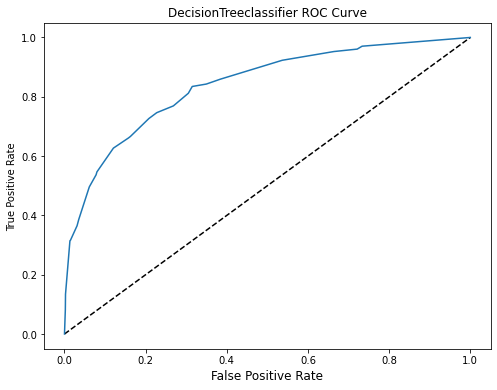

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeclassifier ROC Curve', size= 12)
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.839414693230498


## Ensemble Methods

## 1.Random Forest Model

In [212]:
with open('rf_pkl', 'rb') as files:
    rf_clf= pickle.load(files)

In [213]:
pred= rf_clf.predict(X_test)

In [214]:
print('accuracy of Random Forest Classifier:', round(rf_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Random Forest Classifier: 82.0 %


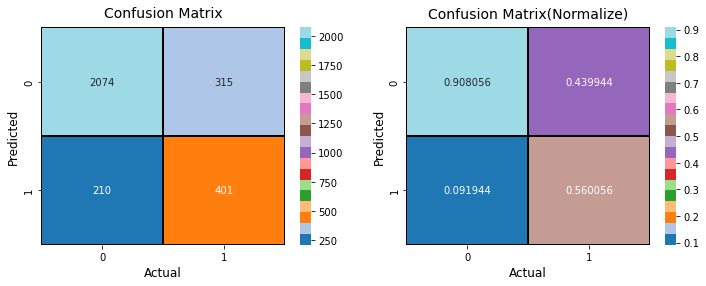

<Figure size 720x576 with 0 Axes>

In [215]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [216]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 56.00000000000001 %
Recall: 66.0 %
F1 Score: 60.0 %


In [217]:
y_pred_probs = rf_clf.predict_proba(X_test)[:, 1]

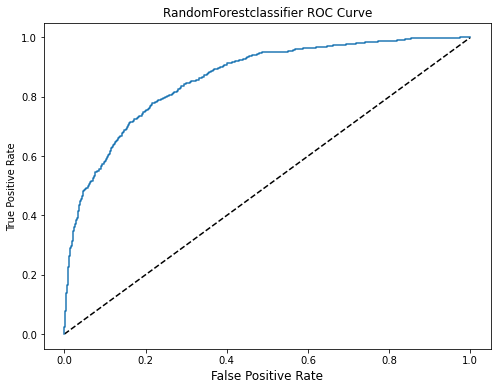

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('RandomForestclassifier ROC Curve', size= 12)
plt.show()

In [219]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8624978505548138


## Random Forest Feature Importance

In [225]:
new_churn_df = churn_df.copy()

In [226]:
new_churn_df['Gender']= np.where(new_churn_df['Gender']=='Male',0,1) 

In [227]:
new_churn_df['Geography']= new_churn_df['Geography'].apply(lambda x : 0 if x=='Spain' else x)

In [228]:
new_churn_df['Geography']= new_churn_df['Geography'].apply(lambda x : 1 if x=='France' else 2)

In [229]:
xx= new_churn_df.iloc[:,:-1].values

In [233]:
rmf= RandomForestClassifier(min_samples_split=5,
                                                                                        min_samples_leaf= 1 ,
                                                                                        max_features= 0.33,
                                                                                         n_estimators= 200 ,
                                                                                          max_depth = 10,
                                                                                      criterion='entropy'   )

In [234]:
rmf.fit(xx,Y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.33,
                       min_samples_split=5, n_estimators=200)

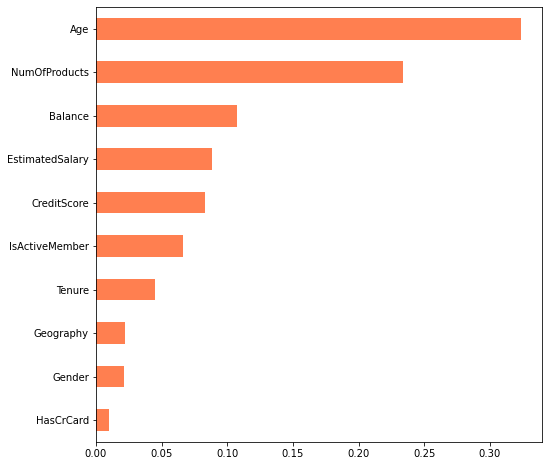

In [235]:
import matplotlib.pyplot as plt
importances_rf = pd.Series(rmf.feature_importances_, index= ['CreditScore','Geography','Gender','Age','Tenure',
                                                            'Balance','NumOfProducts','HasCrCard','IsActiveMember',
                                                             'EstimatedSalary'  ])
sorted_importances_rf = importances_rf.sort_values()
plt.figure(figsize= (8,8))
sorted_importances_rf.plot(kind='barh', color='coral')
plt.show()

## Feature Importance using SHAP

In [236]:
import shap

In [237]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xx, Y, test_size=0.25, random_state=12)

In [238]:
rmf.fit(X_train1,y_train1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.33,
                       min_samples_split=5, n_estimators=200)

In [239]:
explainer = shap.TreeExplainer(rmf)
shap_values = explainer.shap_values(X_test1)

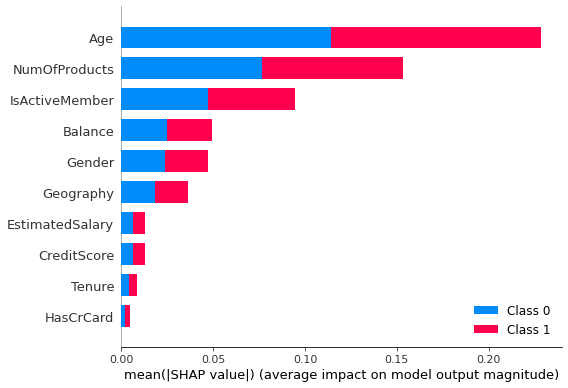

In [240]:
my_xticks = ['CreditScore','Geography','Gender','Age',
             'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

shap.summary_plot(shap_values, X_test1, plot_type="bar",
                 feature_names= my_xticks)
plt.show()

## 2. Gradient Boosting

In [241]:
with open('gb_pkl', 'rb') as files:
    gb_clf= pickle.load(files)

In [242]:
pred= gb_clf.predict(X_test)

In [243]:
print('accuracy of Gradient Boosting Classifier:', round(gb_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Gradient Boosting Classifier: 85.0 %


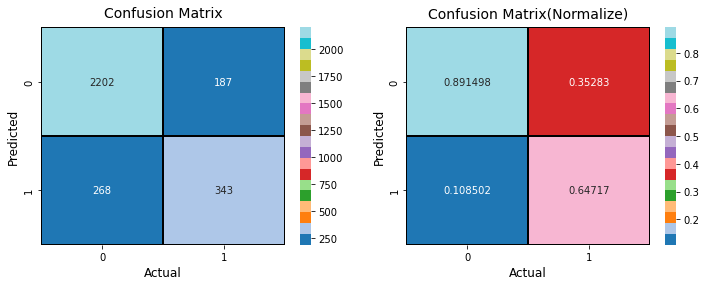

<Figure size 720x576 with 0 Axes>

In [244]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [245]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 65.0 %
Recall: 56.00000000000001 %
F1 Score: 60.0 %


In [246]:
y_pred_probs = gb_clf.predict_proba(X_test)[:, 1]

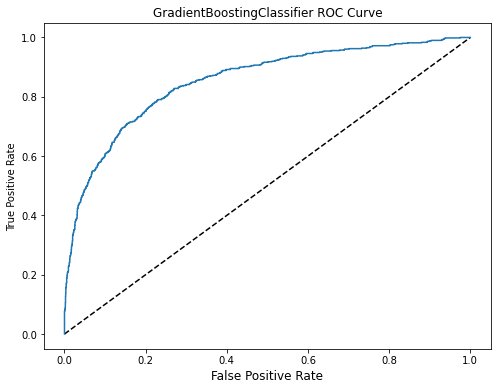

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier ROC Curve', size= 12)
plt.show()

In [248]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8533112417182134


## 3. Ada Boosting

In [254]:
with open('ada_pkl', 'rb') as files:
    ada_clf= pickle.load(files)

In [255]:
pred= ada_clf.predict(X_test)

In [256]:
print('accuracy of Ada Boost Classifier:', round(ada_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Ada Boost Classifier: 82.0 %


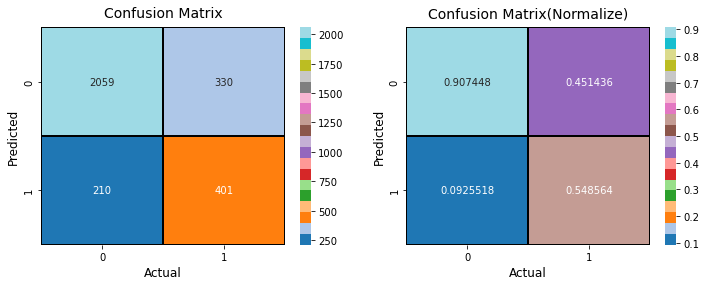

<Figure size 720x576 with 0 Axes>

In [257]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [258]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 55.00000000000001 %
Recall: 66.0 %
F1 Score: 60.0 %


In [259]:
y_pred_probs = ada_clf.predict_proba(X_test)[:, 1]

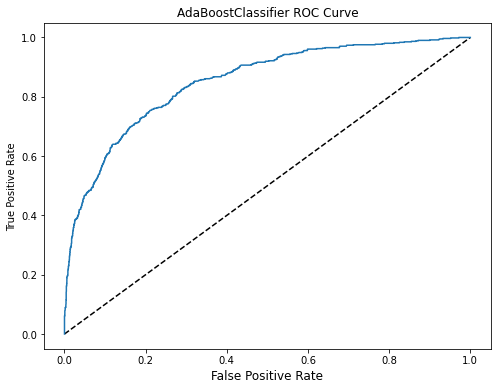

In [260]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier ROC Curve', size= 12)
plt.show()

In [261]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8507788356207083


## 4. XgBoost 

In [268]:
with open('xgb_pkl', 'rb') as files:
    xgb_clf= pickle.load(files)

In [269]:
pred= xgb_clf.predict(X_test)

In [270]:
print('accuracy of XGBoost Classifier:', round(xgb_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of XGBoost Classifier: 85.0 %


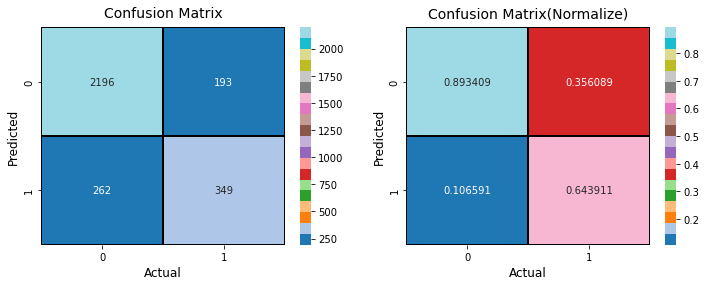

<Figure size 720x576 with 0 Axes>

In [271]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [272]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 64.0 %
Recall: 56.99999999999999 %
F1 Score: 61.0 %


In [273]:
y_pred_probs = xgb_clf.predict_proba(X_test)[:, 1]

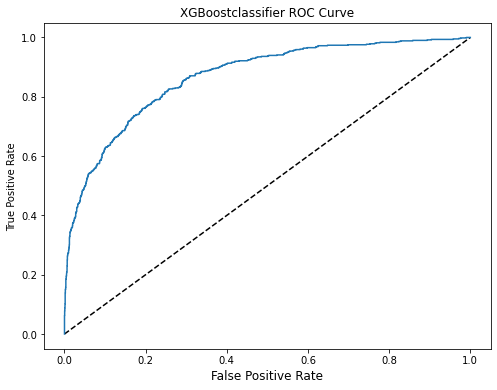

In [274]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('XGBoostclassifier ROC Curve', size= 12)
plt.show()

In [275]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8668597684833448


# Ensemble Model

In [283]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import cross_val_score

In [284]:
ensemblemodel = EnsembleVoteClassifier(clfs=[xgb_clf,rf_clf,ada_clf,gb_clf], voting='hard')

In [285]:
ensemblemodel

EnsembleVoteClassifier(clfs=[Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            callbacks=None,
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=0.7,
                                                            gpu_id=-1,
                                                            grow_policy='depthwise',
                                                            impo...
                             Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                             ('adaboostclassifier',
                                              AdaBoostClassifier(learning_rate=0.7,
                                                                 n_estimators=200,
                                                                 random_state=32))]),
                             Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier(learning_rate=0.3,
                                                                         max_depth=4,
                                                                         max_features='log2',
                                                                         min_samples_split=5,
                                                                         n_estimators=150,
                                                                         random_state=32))])])

In [286]:
scores = cross_val_score(ensemblemodel, X_preprocessed1, Y, cv=5, scoring='accuracy')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [287]:
print("Accuracy: {0:.3f}%, Variance:{1:.3f}".format(scores.mean()*100, scores.std()))

Accuracy: 85.140%, Variance:0.003


## Cross Validation Precision Recall

#### Ensemble Model

In [288]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

 

results = model_selection.cross_validate(estimator=ensemblemodel,
                                          X=X_preprocessed1,
                                          y=Y,
                                          cv=5,
                                          scoring=scoring)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [289]:
np.mean(results['test_precision']),np.mean(results['test_recall']),np.mean(results['test_f1_score']),np.mean(results['fit_time'])

(0.6454576148675032, 0.6013802572626102, 0.6222763252537911, 8.658929681777954)

#### Random Forest Model

In [290]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

 

results = model_selection.cross_validate(estimator=rf_clf,
                                          X=X_preprocessed1,
                                          y=Y,
                                          cv=5,
                                          scoring=scoring)

In [291]:
np.mean(results['test_precision']),np.mean(results['test_recall']),np.mean(results['test_f1_score']),np.mean(results['fit_time'])

(0.5532023642592537,
 0.6858180372886256,
 0.6122475011157309,
 3.1079294204711916)

#### Ada model

In [292]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

 

results = model_selection.cross_validate(estimator=ada_clf,
                                          X=X_preprocessed1,
                                          y=Y,
                                          cv=5,
                                          scoring=scoring)

In [293]:
np.mean(results['test_precision']),np.mean(results['test_recall']),np.mean(results['test_f1_score']),np.mean(results['fit_time'])

(0.5456976990889171,
 0.6548887122416533,
 0.5952599727659571,
 2.5987618446350096)

#### GB Model

In [294]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

 

results = model_selection.cross_validate(estimator=gb_clf,
                                          X=X_preprocessed1,
                                          y=Y,
                                          cv=5,
                                          scoring=scoring)

In [295]:
np.mean(results['test_precision']),np.mean(results['test_recall']),np.mean(results['test_f1_score']),np.mean(results['fit_time'])

(0.6352963561704914,
 0.5930360842125548,
 0.6132623625059227,
 1.5779899597167968)

#### XGB Model

In [296]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

 

results = model_selection.cross_validate(estimator=xgb_clf,
                                          X=X_preprocessed1,
                                          y=Y,
                                          cv=5,
                                          scoring=scoring)

In [297]:
np.mean(results['test_precision']),np.mean(results['test_recall']),np.mean(results['test_f1_score']),np.mean(results['fit_time'])

(0.6479957430391762,
 0.5964698655875127,
 0.6207374562273131,
 0.5831838130950928)

## Multiple ROC CURVE

In [306]:
from sklearn import metrics

Text(0.5, 1.0, 'ROC-AUC')

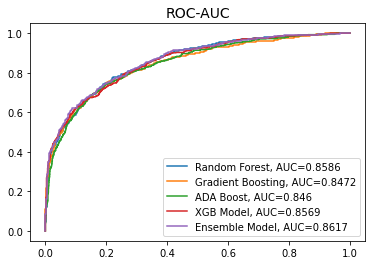

In [307]:
plt.figure(0).clf()


y_pred = rf_clf1.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred)
auc = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


y_pred = gb_clf1.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred)
auc = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

y_pred = ada_clf1.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred)
auc = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="ADA Boost, AUC="+str(auc))

y_pred = xgb_clf1.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred)
auc = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="XGB Model, AUC="+str(auc))

y_pred = ensemblemodel.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred)
auc = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="Ensemble Model, AUC="+str(auc))

#add legend
plt.legend()
plt.title('ROC-AUC', size= 14)

# Deployment

In [185]:
new_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619.0,1,1,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,1,1,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,1,1,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,2,1,43.0,2,125510.82,1,1,1,79084.10,0


In [567]:
preprocessing1 = make_column_transformer( (MinMaxScaler(),
                                          [0,  3, 4, 5, 6, 7,8]),(OneHotEncoder(sparse=False), [1,2]))

In [308]:
rf_model= imbl_pipe(preprocessing1,SMOTE(sampling_strategy='auto', random_state=32),RandomForestClassifier(
    min_samples_split=5, min_samples_leaf= 1 ,max_features= 0.33,n_estimators= 200 ,max_depth = 10,
                                                                                      criterion='entropy'   ))

In [309]:
rf_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2])])),
                ('smote', SMOTE(random_state=32)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        max_features=0.33, min_samples_split=5,
                                        n_estimators=200))])

In [569]:
X1= new_churn_df.iloc[:,:-1].values

In [581]:
X_trained, X_tested, y_trained, y_tested = train_test_split(X1, Y,test_size=0.3, random_state=32)

In [582]:
final_model= rf_model.fit(X_trained,y_trained)

In [583]:
X1[0]

array([619.0, 'France', 'Female', 42.0, 2, 0.0, 1, 1, 101348.88],
      dtype=object)

In [584]:
X_tested[0]

array([650.0, 'Spain', 'Male', 20.0, 8, 0.0, 2, 1, 113469.65],
      dtype=object)

In [572]:
import pickle

In [585]:
filename = 'deploy_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [586]:
loaded_model = pickle.load(open('deploy_model.sav', 'rb'))

In [587]:
input_data = (619.0, 'France','Female',42.0,2,0.00,1,1,101348.88)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person will not churn')
else:
  print('The person will churn')

[1]
The person will churn


## SVC

In [186]:
with open('svc_pkl', 'rb') as files:
    svc_clf= pickle.load(files)

In [187]:
pred= svc_clf.predict(X_test)

In [188]:
print('accuracy of SVC Classifier:', round(svc_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of SVC Classifier: 71.0 %


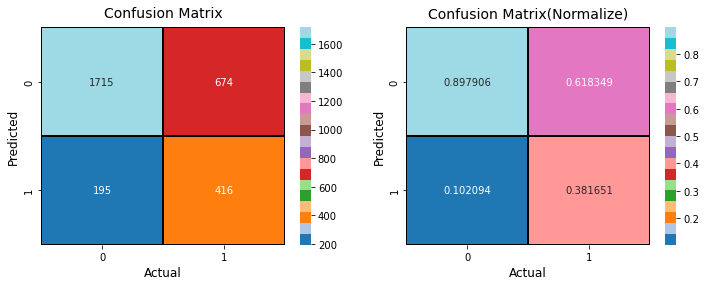

<Figure size 720x576 with 0 Axes>

In [189]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [190]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 38.0 %
Recall: 68.0 %
F1 Score: 49.0 %


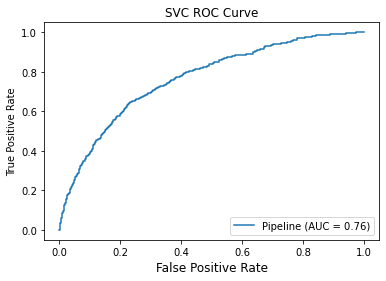

In [191]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svc_clf, X_test, y_test)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve', size= 12)
plt.show()




##  Naive Bayes Classfier

In [193]:
with open('gnb_pkl', 'rb') as files:
    gnb_clf= pickle.load(files)

In [194]:
pred= gnb_clf.predict(X_test)

In [195]:
print('accuracy of Gaussian Naive Bayes Classifier:', round(gnb_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Gaussian Naive Bayes Classifier: 69.0 %


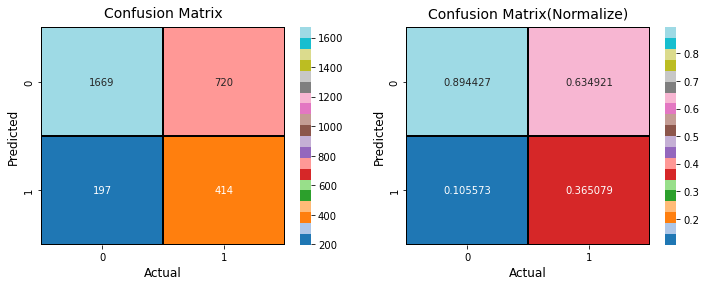

<Figure size 720x576 with 0 Axes>

In [196]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [197]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 37.0 %
Recall: 68.0 %
F1 Score: 47.0 %


In [198]:
y_pred_probs = gnb_clf.predict_proba(X_test)[:, 1]

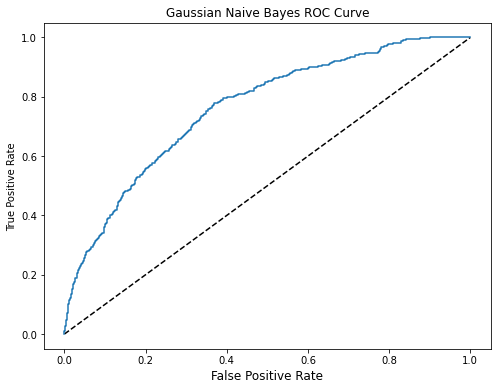

In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve', size= 12)
plt.show()

In [200]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.761048833339385


## Perceptron

In [201]:
with open('perceptron_pkl', 'rb') as files:
    perceptron_clf= pickle.load(files)

In [202]:
pred= perceptron_clf.predict(X_test)

In [203]:
print('accuracy of Perceptron:', round(perceptron_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Perceptron: 62.0 %


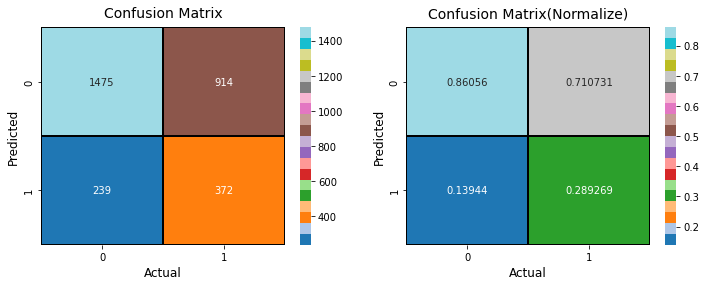

<Figure size 720x576 with 0 Axes>

In [204]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [205]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 28.999999999999996 %
Recall: 61.0 %
F1 Score: 39.0 %


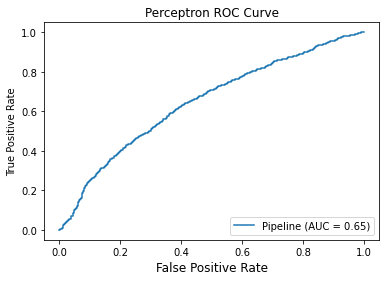

In [206]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(perceptron_clf, X_test, y_test)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('Perceptron ROC Curve', size= 12)
plt.show()